In [186]:
import os
import sys
import csv

import numpy as np
import pandas as pd
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt

from collections import defaultdict

%matplotlib inline

In [187]:
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson

In [188]:
# rand_counts_file = 'data/random_sig_counts.txt'
rand_counts_file = 'data/gene_random_sig_counts.txt'

In [189]:
def empirical_p(li, v):
    return len([i for i in li if i>= v])/float(len(li))

In [190]:
reader = csv.reader(open(rand_counts_file), delimiter='\t')
header = next(reader)

sigcounts = defaultdict(int)
sigcs = list()

for sample_id, nsnps, sigcount in reader:
    sigcounts[sigcount] += 1
    sigcs.append(int(sigcount))

sigcounts

defaultdict(int,
            {'3': 8,
             '4': 3,
             '5': 3,
             '9': 2,
             '1': 13,
             '0': 9,
             '2': 9,
             '6': 1,
             '7': 2})

In [191]:
# x, h = list(zip(*[(c, sigcounts[c]) for c in sorted(sigcounts)]))

# sns.set(style='ticks', font_scale=1.2)
# plt.figure(figsize=(4,2))

# plt.bar(x, h, color='k')
# plt.xlim(-1,11)
# plt.plot([10, 10], [0, 50], 'r--')
# plt.plot([1, 1], [0, 50], 'c--')
# plt.plot([4, 4], [0, 50], 'b--')

# plt.legend(['Hospitalized', 'Negative', 'Positive', 'Random'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

# plt.ylim(0,29)

# plt.xticks(range(0,11), range(0,11))
# plt.xlabel('Num of Study-Wide Significant SNPs')
# plt.ylabel('Count')

# sns.despine()

[1.81687859]


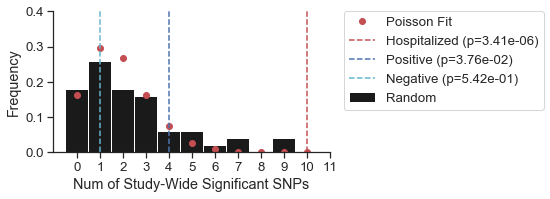

In [192]:
sns.set(style='ticks', font_scale=1.2)
plt.figure(figsize=(8,3))

# the bins should be of integer width, because poisson is an integer distribution
bins = np.arange(11) - 0.5
entries, bin_edges, patches = plt.hist(sigcs, bins=bins, density=True, label='Random', color='k')

# calculate bin centres
bin_middles = 0.5 * (bin_edges[1:] + bin_edges[:-1])


def fit_function(k, lamb):
    '''poisson function, parameter lamb is the fit parameter'''
    return poisson.pmf(k, lamb)


# fit with curve_fit
parameters, cov_matrix = curve_fit(fit_function, bin_middles, entries)
print(parameters)

# plot poisson-deviation with fitted parameter
x_plot = np.arange(0, 11)


plt.plot(
    x_plot,
    fit_function(x_plot, *parameters),
    marker='o', linestyle='',
    color='r',
    label='Poisson Fit',
)

plt.plot([10, 10], [0, 1], 'r--', label='Hospitalized (p=%.2e)' % (1-poisson.cdf(10, parameters[0])))
plt.plot([4, 4], [0, 1], 'b--', label='Positive (p=%.2e)' % (1-poisson.cdf(4, parameters[0])))
plt.plot([1, 1], [0, 1], 'c--', label='Negative (p=%.2e)' % (1-poisson.cdf(1, parameters[0])))

plt.ylim(0,0.4)
plt.xticks(range(0,12), range(0,12))

plt.xlabel('Num of Study-Wide Significant SNPs')
plt.ylabel('Frequency')


#plt.legend(['Hospitalized', 'Negative', 'Positive', 'Random'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
sns.despine()

plt.tight_layout()
plt.savefig('figures/ukbb_empirical_hits_analysis.pdf')

In [193]:
# For comparison, here are what the "empirical p-values" are
empirical_p(sigcs, 1), empirical_p(sigcs, 4), empirical_p(sigcs, 10)

(0.82, 0.22, 0.0)

In [194]:
[sigcounts[c] for c in sorted(sigcounts)], list(map(int,sorted(sigcounts)))

([9, 13, 9, 8, 3, 3, 1, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 9])

In [215]:

stats.chisquare(
    [sigcounts[c] for c in sorted(sigcounts)], 
    len(sigcs)*fit_function(list(map(int,sorted(sigcounts))), *(parameters))
)

Power_divergenceResult(statistic=862.7823067832196, pvalue=6.007429303056856e-181)